      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  

Dimensió de la taula de dades:  (505, 14)

              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.7031

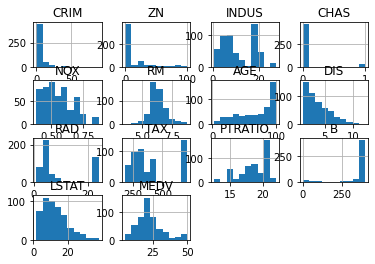

In [2]:
#Exercicis per practicar amb regressions.
#- Exercici 1
# Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) 
# de l'arxiu adjunt.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


dades = pd.read_csv('housing data.csv')
    
dades.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

print(dades.head())
print('\nDimensió de la taula de dades: ', dades.shape)

print('\n', dades.describe())

# Fem una visualització de les dades

dades.drop(1).hist()
plt.show()



In [3]:
# La recta de regressió segueix la següent equació: Y = a·X + b

# Defineixo el MODEL DE REGRESSIÓ # 1:
# --> Relació entre preu de les vivendes (MEDV) i la distància a les àrees d'ocupació de Boston (DIS) 
# per tant la vaiable d'entrada (x) és la distància als centres d'ocupació i la de sortida (y) és el preu de la vivenda. 

x1= dades[['DIS']]
y1= dades[['MEDV']]

print(x1.head())
print(y1.head())

x= np.array(x1)
y= np.array(y1)


# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenamos el modelo
regr.fit(x, y)

# Buscamos los coeficientes de la linea de regresión: 
y_pred = regr.predict(x)


# Veamos los coeficienetes obtenidos
print('\nMODEL DE REGRESSIÓ # 1:\n')
print('Coeficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Terme independent: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y, y_pred))

# La equació de regressió és: Y = 1'09·X + 18'39  
 

      DIS
0  4.9671
1  4.9671
2  6.0622
3  6.0622
4  6.0622
   MEDV
0  21.6
1  34.7
2  33.4
3  36.2
4  28.7

MODEL DE REGRESSIÓ # 1:

Coeficients: 
 [[1.09146186]]
Terme independent: 
 [18.38839415]
Mean squared error: 79.30
Variance score: 0.06



Visualització de les variables que volem relacionar mitjançant una recta de regressió:


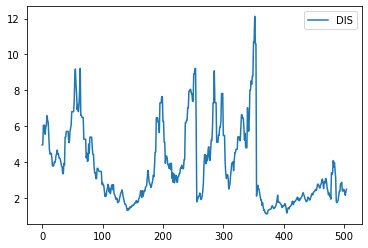

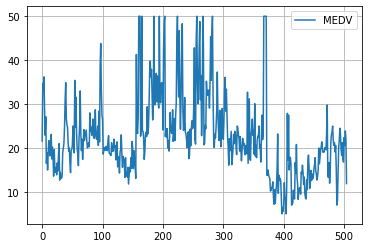

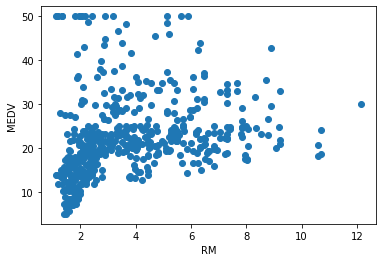

In [4]:
print("\nVisualització de les variables que volem relacionar mitjançant una recta de regressió:")

import matplotlib.pyplot as plt
my_plot = x1.plot.line()
my_plot = y1.plot.line()
my_plot.grid()

plt.show() 


plt.scatter(x, y)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [5]:
# Defineixo el MODEL DE REGRESSIÓ # 2:
# --> Relació entre preu de les vivendes i nº d'habitacions (RM), 
# per tant la vaiable d'entrada (x) és el nº d'habitacions i la de sortida (y) és el preu de la vivenda. 

x1= dades[['RM']]
y1= dades[['MEDV']]

print(x1.head())
print(y1.head())

x= np.array(x1)
y= np.array(y1)


# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenamos el modelo
regr.fit(x, y)

# Buscamos los coeficientes de la linea de regresión: 
y_pred = regr.predict(x)


# Veamos los coeficienetes obtenidos
print('\nMODEL DE REGRESSIÓ # 2:\n')
print('Coeficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Terme independent: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y, y_pred))

# La equació de regressió és: Y = 9'10·X - 34'68  

      RM
0  6.421
1  7.185
2  6.998
3  7.147
4  6.430
   MEDV
0  21.6
1  34.7
2  33.4
3  36.2
4  28.7

MODEL DE REGRESSIÓ # 2:

Coeficients: 
 [[9.10348156]]
Terme independent: 
 [-34.67691791]
Mean squared error: 43.68
Variance score: 0.48


In [6]:
# EL MATEIX CÀLCUL DE LA REGRESSIÓ LINEAL FET AMB DIFERENTS FORMULES. MODEL DE REGRESSIÓ # 1

x1= dades[['DIS']]
y1= dades[['MEDV']]

x= np.array(x1)
y= np.array(y1)


# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682
# vamos a predicir y = regresion_lineal(5)


# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)

print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)

print('Coeficiente de Determinación R2 = ' + str(r2))

w = [[1.09146186]], b = [18.38839415]
Error Cuadrático Medio (MSE) = 79.30046470936229
Raíz del Error Cuadrático Medio (RMSE) = 8.905080836767418
Coeficiente de Determinación R2 = 0.06244779622865859


In [7]:
# EL MATEIX CÀLCUL DE LA REGRESSIÓ LINEAL FET AMB DIFERENTS FORMULES. MODEL DE REGRESSIÓ # 2

x1= dades[['RM']]
y1= dades[['MEDV']]

x= np.array(x1)
y= np.array(y1)


# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682
# vamos a predicir y = regresion_lineal(5)


# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)

print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)

print('Coeficiente de Determinación R2 = ' + str(r2))

w = [[9.10348156]], b = [-34.67691791]
Error Cuadrático Medio (MSE) = 43.684145764718124
Raíz del Error Cuadrático Medio (RMSE) = 6.6093982906705
Coeficiente de Determinación R2 = 0.48353181432561443


In [8]:
#- Exercici 2
# Compara’ls en base al MSE i al R2.


# --> Interpretación del MSE: el error cuadrático medio es el promedio de la diferencia cuadrática entre cada punto predicho y el punto real. Por lo general, es un número muy grande porque cuadramos cada diferencia para eliminar los números negativos antes de tomar el promedio. Por lo tanto, a veces usamos Root Mean Squared Error para reducir ese número a escala (RMSE es la raíz cuadrada de MSE).
# Lo mismo dicho de una manera más sencilla: 

print('Interpretación del MSE: \nEl MSE es la distancia promedio, al cuadrado (para eliminar los números negativos), entre el valor objetivo predicho del modelo y el valor objetivo real. Por lo tanto los valores más bajos de MSE indican un mejor ajuste.')

print('\n--> En este ejercicio el valor MSE del modelo # 2 es menor que el del modelo # 1, por lo tanto, los valores predichos se ajustan más en el modelo 2 que en el 1')

# --> Interpretación del R2: R-cuadrado indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que también las variables independientes seleccionadas explican la variabilidad en sus variables dependiente.
# Definición de R2: es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. Es decir:
# R2 = Variación explicada / variación total

print('\nInterpretación del R2: \nEs un valor entre 0 y 1, cuanto más próximo a 1, mejor es el ajuste del modelo (mejor se ajusta la linea de regresión a la distribución de los datos reales)')

print('\n-->En este ejercicio el MODELO # 2 tiene un R2  mayor que el MODELO # 1, por lo tanto la equación de regresión calculada para relacionar el precio de la vivienda con el número de habitaciones, es mucho más precisa a la hora de predecir resultados que la ecuación calculada para relacionar el precio de la vivienda con la distancia a los centros de trabajo')


Interpretación del MSE: 
El MSE es la distancia promedio, al cuadrado (para eliminar los números negativos), entre el valor objetivo predicho del modelo y el valor objetivo real. Por lo tanto los valores más bajos de MSE indican un mejor ajuste.

--> En este ejercicio el valor MSE del modelo # 2 es menor que el del modelo # 1, por lo tanto, los valores predichos se ajustan más en el modelo 2 que en el 1

Interpretación del R2: 
Es un valor entre 0 y 1, cuanto más próximo a 1, mejor es el ajuste del modelo (mejor se ajusta la linea de regresión a la distribución de los datos reales)

-->En este ejercicio el MODELO # 2 tiene un R2  mayor que el MODELO # 1, por lo tanto la equación de regresión calculada para relacionar el precio de la vivienda con el número de habitaciones, es mucho más precisa a la hora de predecir resultados que la ecuación calculada para relacionar el precio de la vivienda con la distancia a los centros de trabajo


In [9]:
#- Exercici 3
# Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


# División de los datos en train y test

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2) #20%

x_train.sample(5)

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

## --> De este ejercicio no entiendo: cómo se interpreta el puntaje Entrenamiento ? Y el Puntaje Testing? Qué significa y como se mejora la predicción? --- > Estas son preguntas para resolverlas yo la semana que viene





Puntaje Entrenamiento:  0.48368833747521967
Puntaje Testing:  0.4806421696460935


In [12]:
#- Exercici 4
# Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).


#- Exercici 5
# No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions. 

In [ ]:
#---------------------------------

In [11]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [9.1], b = -34.7
